In [109]:
import sgt
import pandas as pd
from sgt import SGT
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [110]:

def generate_stats(filename):
    # Loading data
    corpus = pd.read_csv(filename)
    corpus = corpus[['id', 'name_struct']]
    corpus = corpus.rename(columns={"name_struct": "sequence"})

    corpus['sequence'] = corpus['sequence'].apply(lambda x: x.split('-'))

    print(corpus.head())

    %time
    # Compute SGT embeddings
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(corpus)

    # Set the id column as the dataframe index
    sgtembedding_df = sgtembedding_df.set_index('id')
    print(sgtembedding_df)


    pca = PCA(n_components=2)
    pca.fit(sgtembedding_df)

    X=pca.transform(sgtembedding_df)

    print(np.sum(pca.explained_variance_ratio_))
    df = pd.DataFrame(data=X, columns=['x1', 'x2'])
    print(df.head())

    kmeans = KMeans(n_clusters=5, max_iter =300)
    kmeans.fit(df)

    labels = kmeans.predict(df)
    centroids = kmeans.cluster_centers_

    print('centroids', centroids)
    print('cluster_centers_', kmeans.cluster_centers_)
    print('shape', df.shape)
    print('labels', labels)
    # print()


    fig = plt.figure(figsize=(5, 5))
    # colmap = {1: 'r', 2: 'g'}
    colmap = {1: 'purple', 2: 'r', 3: 'g', 4: 'b', 5: 'y'}
    colors = list(map(lambda x: colmap[x+1], labels))
    plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)
    
#     plt.scatter(df['x1'], df['x2'], alpha=0.5, c=labels.astype(float))

    
    # plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
    print(len(labels))
    
    corpus = pd.read_csv('name_structs_1.csv')
    corpus['label'] = 0
    
    index = 0
    while index < len(labels):
    
        corpus.loc[ corpus['id'] == index + 1, 'label' ] = labels[index]
        index += 1
    
    corpus.to_csv('name_stucts_1_with_label.csv')
    

   id    sequence
0   1       [Wrd]
1   2  [Nam, Wrd]
2   3  [Nam, Wrd]
3   4       [Nam]
4   5  [Nam, Wrd]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
         (Dig, Dig)  (Dig, Nam)  (Dig, Slg)  (Dig, SlgS)  (Dig, Sym)  \
id                                                                     
1.0             0.0         0.0         0.0          0.0         0.0   
2.0             0.0         0.0         0.0          0.0         0.0   
3.0             0.0         0.0         0.0          0.0         0.0   
4.0             0.0         0.0         0.0          0.0         0.0   
5.0             0.0         0.0         0.0          0.0         0.0   
...             ...         ...         ...          ...         ...   
29702.0         0.0         0.0         0.0          0.0         0.0   
29703.0    

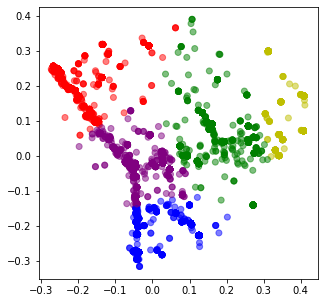

In [111]:
# generate_stats('name_structs_fb_2.csv')

generate_stats('name_structs_1.csv')

In [112]:
labels[-1]

2